# Face Generation
In this project, you'll use generative adversarial networks to generate new images of faces.
### Get the Data
You'll be using two datasets in this project:
- MNIST
- CelebA

Since the celebA dataset is complex and you're doing GANs in a project for the first time, we want you to test your neural network on MNIST before CelebA.  Running the GANs on MNIST will allow you to see how well your model trains sooner.

If you're using [FloydHub](https://www.floydhub.com/), set `data_dir` to "/input" and use the [FloydHub data ID](http://docs.floydhub.com/home/using_datasets/) "R5KrjnANiKVhLWAkpXhNBe".

In [1]:
data_dir = './data'

# FloydHub - Use with data ID "R5KrjnANiKVhLWAkpXhNBe"
#data_dir = '/input'


"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import helper

helper.download_extract('mnist', data_dir)
helper.download_extract('celeba', data_dir)

Found mnist Data
Found celeba Data


## Explore the Data
### MNIST
As you're aware, the [MNIST](http://yann.lecun.com/exdb/mnist/) dataset contains images of handwritten digits. You can view the first number of examples by changing `show_n_images`. 

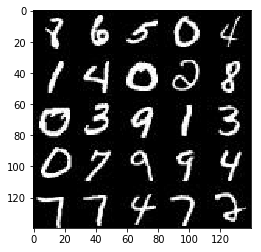

In [2]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
%matplotlib inline
import os
from glob import glob
from matplotlib import pyplot

mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'mnist/*.jpg'))[:show_n_images], 28, 28, 'L')
pyplot.imshow(helper.images_square_grid(mnist_images, 'L'), cmap='gray')

### CelebA
The [CelebFaces Attributes Dataset (CelebA)](http://mmlab.ie.cuhk.edu.hk/projects/CelebA.html) dataset contains over 200,000 celebrity images with annotations.  Since you're going to be generating faces, you won't need the annotations.  You can view the first number of examples by changing `show_n_images`.

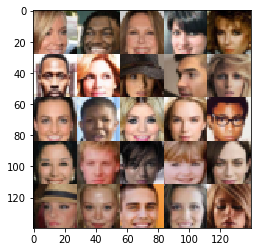

In [3]:
show_n_images = 25

"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
mnist_images = helper.get_batch(glob(os.path.join(data_dir, 'img_align_celeba/*.jpg'))[:show_n_images], 28, 28, 'RGB')
pyplot.imshow(helper.images_square_grid(mnist_images, 'RGB'))

## Preprocess the Data
Since the project's main focus is on building the GANs, we'll preprocess the data for you.  The values of the MNIST and CelebA dataset will be in the range of -0.5 to 0.5 of 28x28 dimensional images.  The CelebA images will be cropped to remove parts of the image that don't include a face, then resized down to 28x28.

The MNIST images are black and white images with a single [color channel](https://en.wikipedia.org/wiki/Channel_(digital_image%29) while the CelebA images have [3 color channels (RGB color channel)](https://en.wikipedia.org/wiki/Channel_(digital_image%29#RGB_Images).
## Build the Neural Network
You'll build the components necessary to build a GANs by implementing the following functions below:
- `model_inputs`
- `discriminator`
- `generator`
- `model_loss`
- `model_opt`
- `train`

### Check the Version of TensorFlow and Access to GPU
This will check to make sure you have the correct version of TensorFlow and access to a GPU

In [4]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
from distutils.version import LooseVersion
import warnings
import tensorflow as tf

# Check TensorFlow Version
assert LooseVersion(tf.__version__) >= LooseVersion('1.0'), 'Please use TensorFlow version 1.0 or newer.  You are using {}'.format(tf.__version__)
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
if not tf.test.gpu_device_name():
    warnings.warn('No GPU found. Please use a GPU to train your neural network.')
else:
    print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


TensorFlow Version: 1.5.0


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: UserWarning: No GPU found. Please use a GPU to train your neural network.
  


### Input
Implement the `model_inputs` function to create TF Placeholders for the Neural Network. It should create the following placeholders:
- Real input images placeholder with rank 4 using `image_width`, `image_height`, and `image_channels`.
- Z input placeholder with rank 2 using `z_dim`.
- Learning rate placeholder with rank 0.

Return the placeholders in the following the tuple (tensor of real input images, tensor of z data)

In [5]:
import problem_unittests as tests

def model_inputs(image_width, image_height, image_channels, z_dim):
    """
    Create the model inputs
    :param image_width: The input image width
    :param image_height: The input image height
    :param image_channels: The number of image channels
    :param z_dim: The dimension of Z
    :return: Tuple of (tensor of real input images, tensor of z data, learning rate)
    """
    # TODO: Implement Function

    real_inputs = tf.placeholder(tf.float32, (None, image_width, image_height, image_channels),
                                'real_inputs')
    z_inputs = tf.placeholder(tf.float32, (None, z_dim), 'z_inputs')
    learning_rate = tf.placeholder(tf.float32, name='learning_rate')

    return real_inputs, z_inputs, learning_rate


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_inputs(model_inputs)

Tests Passed


### Discriminator
Implement `discriminator` to create a discriminator neural network that discriminates on `images`.  This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "discriminator" to allow the variables to be reused.  The function should return a tuple of (tensor output of the discriminator, tensor logits of the discriminator).

In [6]:
def discriminator(images, reuse=False):
    """
    Create the discriminator network
    :param images: Tensor of input image(s)
    :param reuse: Boolean if the weights should be reused
    :return: Tuple of (tensor output of the discriminator, tensor logits of the discriminator)
    """
    # TODO: Implement Function

    alpha = 0.1
    keep_prob = 0.9

    with tf.variable_scope('discriminator', reuse=reuse):
        x1 = tf.layers.conv2d(images, 64, 5, strides=2, padding='same', activation=None)
        x1 = tf.maximum(alpha * x1, x1)
        
        x2 = tf.layers.conv2d(x1, 128, 5, strides=2, padding='same', activation=None)
        x2 = tf.layers.batch_normalization(x2, training=True)
        x2 = tf.maximum(alpha * x2, x2)
        x2 = tf.nn.dropout(x2, keep_prob=keep_prob)
        
        x3 = tf.layers.conv2d(x2, 256, 5, strides=2, padding='same', activation=None)
        x3 = tf.layers.batch_normalization(x3, training=True)
        x3 = tf.maximum(alpha * x3, x3)
        x3 = tf.nn.dropout(x3, keep_prob=keep_prob)
        
        flat = tf.reshape(x3, (-1,  4 * 4 * 256))
        logits = tf.layers.dense(flat, 1)
        out = tf.sigmoid(logits)
        
        return out, logits


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_discriminator(discriminator, tf)

Tests Passed


### Generator
Implement `generator` to generate an image using `z`. This function should be able to reuse the variables in the neural network.  Use [`tf.variable_scope`](https://www.tensorflow.org/api_docs/python/tf/variable_scope) with a scope name of "generator" to allow the variables to be reused. The function should return the generated 28 x 28 x `out_channel_dim` images.

In [7]:
def generator(z, out_channel_dim, is_train=True):
    """
    Create the generator network
    :param z: Input z
    :param out_channel_dim: The number of channels in the output image
    :param is_train: Boolean if generator is being used for training
    :return: The tensor output of the generator
    """
    # TODO: Implement Function
    
    alpha = 0.2
    
    with tf.variable_scope('generator', reuse=not is_train):
        
        h1 = tf.layers.dense(z, 2*2*512)
        h1 = tf.reshape(h1, (-1, 2, 2, 512))
        h1 = tf.layers.batch_normalization(h1, training=is_train)
        h1 = tf.maximum(alpha * h1, h1)
    
        h2 = tf.layers.conv2d_transpose(h1, 256, 5, 2, 'valid')
        h2 = tf.layers.batch_normalization(h2, training=is_train)
        h2 = tf.maximum(alpha * h2, h2)
    
        h3 = tf.layers.conv2d_transpose(h2, 128, 5, 2, 'same')
        h3 = tf.layers.batch_normalization(h3, training=is_train)
        h3 = tf.maximum(alpha * h3, h3)
    
        logits = tf.layers.conv2d_transpose(h3, out_channel_dim, 5, 2, 'same')
        out = tf.tanh(logits)
    
        return out


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_generator(generator, tf)

Tests Passed


### Loss
Implement `model_loss` to build the GANs for training and calculate the loss.  The function should return a tuple of (discriminator loss, generator loss).  Use the following functions you implemented:
- `discriminator(images, reuse=False)`
- `generator(z, out_channel_dim, is_train=True)`

In [8]:
def model_loss(input_real, input_z, out_channel_dim):
    """
    Get the loss for the discriminator and generator
    :param input_real: Images from the real dataset
    :param input_z: Z input
    :param out_channel_dim: The number of channels in the output image
    :return: A tuple of (discriminator loss, generator loss)
    """
    # TODO: Implement Function
    
    g_model = generator(input_z, out_channel_dim)
    d_model_real, d_logits_real = discriminator(input_real)
    d_model_fake, d_logits_fake = discriminator(g_model, reuse=True)
    
    d_loss_real = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_real, 
                                                                         labels=tf.ones_like(d_model_real)))
    d_loss_fake = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                         labels=tf.zeros_like(d_model_fake)))
    
    g_loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=d_logits_fake, 
                                                                    labels=tf.ones_like(d_model_fake)))
    
    d_loss = d_loss_real + d_loss_fake

    return d_loss, g_loss


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_loss(model_loss)

Tests Passed


### Optimization
Implement `model_opt` to create the optimization operations for the GANs. Use [`tf.trainable_variables`](https://www.tensorflow.org/api_docs/python/tf/trainable_variables) to get all the trainable variables.  Filter the variables with names that are in the discriminator and generator scope names.  The function should return a tuple of (discriminator training operation, generator training operation).

In [9]:
def model_opt(d_loss, g_loss, learning_rate, beta1):
    """
    Get optimization operations
    :param d_loss: Discriminator loss Tensor
    :param g_loss: Generator loss Tensor
    :param learning_rate: Learning Rate Placeholder
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :return: A tuple of (discriminator training operation, generator training operation)
    """
    # TODO: Implement Function
    
    t_vars = tf.trainable_variables()
    d_vars = [var for var in t_vars if var.name.startswith('discriminator')]
    g_vars = [var for var in t_vars if var.name.startswith('generator')]
    
    d_train_opt = tf.train.AdamOptimizer(
        learning_rate, beta1=beta1).minimize(d_loss, var_list=d_vars)
    
    ops = tf.get_collection(tf.GraphKeys.UPDATE_OPS)
    g_updates = [opt for opt in ops if opt.name.startswith('generator')]
    with tf.control_dependencies(g_updates):
        g_train_opt = tf.train.AdamOptimizer(
            learning_rate, beta1).minimize(g_loss, var_list=g_vars)
        
    return d_train_opt, g_train_opt


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
tests.test_model_opt(model_opt, tf)

Tests Passed


## Neural Network Training
### Show Output
Use this function to show the current output of the generator during training. It will help you determine how well the GANs is training.

In [10]:
"""
DON'T MODIFY ANYTHING IN THIS CELL
"""
import numpy as np

def show_generator_output(sess, n_images, input_z, out_channel_dim, image_mode):
    """
    Show example output for the generator
    :param sess: TensorFlow session
    :param n_images: Number of Images to display
    :param input_z: Input Z Tensor
    :param out_channel_dim: The number of channels in the output image
    :param image_mode: The mode to use for images ("RGB" or "L")
    """
    cmap = None if image_mode == 'RGB' else 'gray'
    z_dim = input_z.get_shape().as_list()[-1]
    example_z = np.random.uniform(-1, 1, size=[n_images, z_dim])

    samples = sess.run(
        generator(input_z, out_channel_dim, False),
        feed_dict={input_z: example_z})

    images_grid = helper.images_square_grid(samples, image_mode)
    pyplot.imshow(images_grid, cmap=cmap)
    pyplot.show()

### Train
Implement `train` to build and train the GANs.  Use the following functions you implemented:
- `model_inputs(image_width, image_height, image_channels, z_dim)`
- `model_loss(input_real, input_z, out_channel_dim)`
- `model_opt(d_loss, g_loss, learning_rate, beta1)`

Use the `show_generator_output` to show `generator` output while you train. Running `show_generator_output` for every batch will drastically increase training time and increase the size of the notebook.  It's recommended to print the `generator` output every 100 batches.

In [11]:
def train(epoch_count, batch_size, z_dim, learning_rate, beta1, get_batches, data_shape, data_image_mode):
    """
    Train the GAN
    :param epoch_count: Number of epochs
    :param batch_size: Batch Size
    :param z_dim: Z dimension
    :param learning_rate: Learning Rate
    :param beta1: The exponential decay rate for the 1st moment in the optimizer
    :param get_batches: Function to get batches
    :param data_shape: Shape of the data
    :param data_image_mode: The image mode to use for images ("RGB" or "L")
    """
    # TODO: Build Model
    _, img_width, img_height, img_channels = data_shape
    
    real_input, z_input, lr = model_inputs(
        img_width, img_height, img_channels, z_dim)
    
    d_loss, g_loss = model_loss(real_input, z_input, img_channels)
    d_opt, g_opt = model_opt(d_loss, g_loss, learning_rate, beta1)
    
    steps = 0
    print_every = 10
    show_every = 100
    losses = []
    n_images = 25
    
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())
        for epoch_i in range(epoch_count):
            for batch_images in get_batches(batch_size):
                # TODO: Train Model
                steps += 1
                batch_images *= 2.0
                z_sample = np.random.uniform(-1, 1, (batch_size, z_dim))
                
                _ = sess.run(d_opt, feed_dict={
                        real_input: batch_images, z_input: z_sample, lr: learning_rate})
                _ = sess.run(g_opt, feed_dict={
                        z_input: z_sample, lr: learning_rate})
                
                if steps % print_every == 0:
                    train_loss_d = d_loss.eval({z_input: z_sample, real_input: batch_images})
                    train_loss_g = g_loss.eval({z_input: z_sample})
                    
                    print("Epoch {}/{}...".format(epoch_i+1, epoch_count),
                          "Discriminator Loss: {:.4f}...".format(train_loss_d),
                          "Generator Loss: {:.4f}".format(train_loss_g))
                    losses.append((train_loss_d, train_loss_g))
                
                if steps % show_every == 0:
                    show_generator_output(sess, n_images, z_input, img_channels, data_image_mode)
                

### MNIST
Test your GANs architecture on MNIST.  After 2 epochs, the GANs should be able to generate images that look like handwritten digits.  Make sure the loss of the generator is lower than the loss of the discriminator or close to 0.

Epoch 1/2... Discriminator Loss: 0.0074... Generator Loss: 6.1151
Epoch 1/2... Discriminator Loss: 1.8505... Generator Loss: 6.6497
Epoch 1/2... Discriminator Loss: 1.0437... Generator Loss: 5.4074
Epoch 1/2... Discriminator Loss: 0.6078... Generator Loss: 4.8785
Epoch 1/2... Discriminator Loss: 10.4764... Generator Loss: 23.3232
Epoch 1/2... Discriminator Loss: 0.0515... Generator Loss: 4.9093
Epoch 1/2... Discriminator Loss: 12.9340... Generator Loss: 24.6166
Epoch 1/2... Discriminator Loss: 0.5637... Generator Loss: 3.7186
Epoch 1/2... Discriminator Loss: 0.2432... Generator Loss: 2.4044
Epoch 1/2... Discriminator Loss: 0.2792... Generator Loss: 6.1025


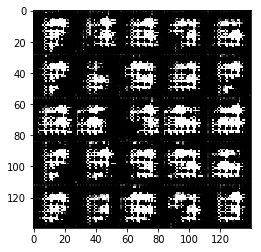

Epoch 1/2... Discriminator Loss: 0.3685... Generator Loss: 3.1132
Epoch 1/2... Discriminator Loss: 0.3543... Generator Loss: 2.3586
Epoch 1/2... Discriminator Loss: 0.5178... Generator Loss: 2.6545
Epoch 1/2... Discriminator Loss: 0.7389... Generator Loss: 1.1199
Epoch 1/2... Discriminator Loss: 0.5544... Generator Loss: 1.8686
Epoch 1/2... Discriminator Loss: 0.4488... Generator Loss: 2.4939
Epoch 1/2... Discriminator Loss: 0.6339... Generator Loss: 2.7820
Epoch 1/2... Discriminator Loss: 1.0098... Generator Loss: 2.8140
Epoch 1/2... Discriminator Loss: 0.6427... Generator Loss: 1.6475
Epoch 1/2... Discriminator Loss: 2.3746... Generator Loss: 0.2904


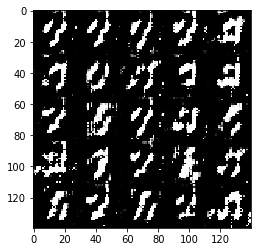

Epoch 1/2... Discriminator Loss: 0.2940... Generator Loss: 2.7549
Epoch 1/2... Discriminator Loss: 1.1182... Generator Loss: 0.7162
Epoch 1/2... Discriminator Loss: 0.1980... Generator Loss: 3.5106
Epoch 1/2... Discriminator Loss: 1.0827... Generator Loss: 4.7563
Epoch 1/2... Discriminator Loss: 0.1453... Generator Loss: 3.1586
Epoch 1/2... Discriminator Loss: 5.6313... Generator Loss: 0.0119
Epoch 1/2... Discriminator Loss: 0.4738... Generator Loss: 1.7904
Epoch 1/2... Discriminator Loss: 0.3069... Generator Loss: 2.7755
Epoch 1/2... Discriminator Loss: 1.7212... Generator Loss: 0.4110
Epoch 1/2... Discriminator Loss: 0.5404... Generator Loss: 1.9372


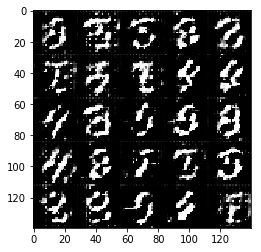

Epoch 1/2... Discriminator Loss: 0.7607... Generator Loss: 2.8050
Epoch 1/2... Discriminator Loss: 1.7809... Generator Loss: 4.8556
Epoch 1/2... Discriminator Loss: 1.4411... Generator Loss: 0.5690
Epoch 1/2... Discriminator Loss: 1.3468... Generator Loss: 0.7015
Epoch 1/2... Discriminator Loss: 1.0835... Generator Loss: 0.9861
Epoch 1/2... Discriminator Loss: 0.9115... Generator Loss: 1.2591
Epoch 1/2... Discriminator Loss: 0.6024... Generator Loss: 1.9142
Epoch 1/2... Discriminator Loss: 1.0781... Generator Loss: 1.1169
Epoch 1/2... Discriminator Loss: 0.7938... Generator Loss: 1.2602
Epoch 1/2... Discriminator Loss: 1.1259... Generator Loss: 0.8053


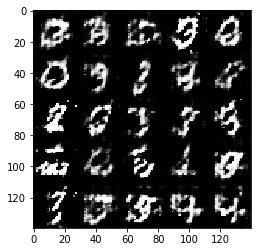

Epoch 1/2... Discriminator Loss: 0.6598... Generator Loss: 1.3933
Epoch 1/2... Discriminator Loss: 1.9497... Generator Loss: 4.5603
Epoch 1/2... Discriminator Loss: 1.0071... Generator Loss: 0.7663
Epoch 1/2... Discriminator Loss: 0.8132... Generator Loss: 0.9829
Epoch 1/2... Discriminator Loss: 0.9288... Generator Loss: 1.1175
Epoch 1/2... Discriminator Loss: 0.8621... Generator Loss: 1.5592
Epoch 1/2... Discriminator Loss: 0.7194... Generator Loss: 1.2271
Epoch 1/2... Discriminator Loss: 1.9023... Generator Loss: 3.7493
Epoch 1/2... Discriminator Loss: 1.0900... Generator Loss: 1.3548
Epoch 1/2... Discriminator Loss: 0.7651... Generator Loss: 1.3916


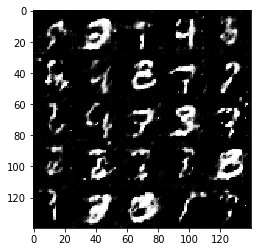

Epoch 1/2... Discriminator Loss: 0.7601... Generator Loss: 1.2616
Epoch 1/2... Discriminator Loss: 0.7906... Generator Loss: 1.8311
Epoch 1/2... Discriminator Loss: 1.1822... Generator Loss: 0.7106
Epoch 1/2... Discriminator Loss: 0.7450... Generator Loss: 1.8604
Epoch 1/2... Discriminator Loss: 0.9230... Generator Loss: 0.8364
Epoch 1/2... Discriminator Loss: 0.6900... Generator Loss: 1.6021
Epoch 1/2... Discriminator Loss: 0.4962... Generator Loss: 1.5815
Epoch 1/2... Discriminator Loss: 0.6127... Generator Loss: 1.4766
Epoch 1/2... Discriminator Loss: 2.5924... Generator Loss: 0.1555
Epoch 1/2... Discriminator Loss: 1.1541... Generator Loss: 1.0056


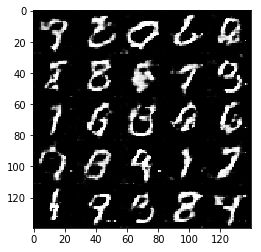

Epoch 1/2... Discriminator Loss: 1.0988... Generator Loss: 1.0206
Epoch 1/2... Discriminator Loss: 0.8328... Generator Loss: 1.0920
Epoch 1/2... Discriminator Loss: 1.1217... Generator Loss: 0.6257
Epoch 1/2... Discriminator Loss: 1.5558... Generator Loss: 0.4600
Epoch 1/2... Discriminator Loss: 0.5433... Generator Loss: 2.1668
Epoch 1/2... Discriminator Loss: 0.5103... Generator Loss: 2.4152
Epoch 1/2... Discriminator Loss: 1.7136... Generator Loss: 0.8726
Epoch 1/2... Discriminator Loss: 0.5449... Generator Loss: 1.4999
Epoch 1/2... Discriminator Loss: 1.0396... Generator Loss: 1.3055
Epoch 1/2... Discriminator Loss: 0.9232... Generator Loss: 0.9662


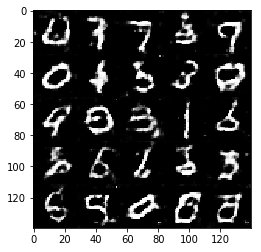

Epoch 1/2... Discriminator Loss: 0.8396... Generator Loss: 1.6080
Epoch 1/2... Discriminator Loss: 0.8178... Generator Loss: 1.4315
Epoch 1/2... Discriminator Loss: 0.7761... Generator Loss: 2.2173
Epoch 1/2... Discriminator Loss: 1.6254... Generator Loss: 0.4476
Epoch 1/2... Discriminator Loss: 0.9592... Generator Loss: 0.9992
Epoch 1/2... Discriminator Loss: 0.4811... Generator Loss: 2.0167
Epoch 1/2... Discriminator Loss: 0.4745... Generator Loss: 1.8754
Epoch 1/2... Discriminator Loss: 0.8962... Generator Loss: 0.8839
Epoch 1/2... Discriminator Loss: 0.8263... Generator Loss: 2.6964
Epoch 1/2... Discriminator Loss: 2.1676... Generator Loss: 4.0927


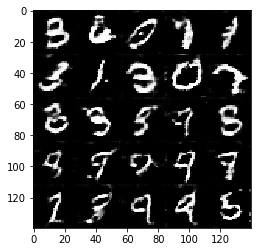

Epoch 1/2... Discriminator Loss: 1.2314... Generator Loss: 0.7324
Epoch 1/2... Discriminator Loss: 0.8052... Generator Loss: 1.5883
Epoch 1/2... Discriminator Loss: 2.1837... Generator Loss: 0.2614
Epoch 1/2... Discriminator Loss: 0.7894... Generator Loss: 1.1615
Epoch 1/2... Discriminator Loss: 1.3017... Generator Loss: 0.6102
Epoch 1/2... Discriminator Loss: 1.5606... Generator Loss: 0.3643
Epoch 1/2... Discriminator Loss: 0.5595... Generator Loss: 1.7205
Epoch 1/2... Discriminator Loss: 0.7268... Generator Loss: 1.5327
Epoch 1/2... Discriminator Loss: 1.4062... Generator Loss: 0.4993
Epoch 1/2... Discriminator Loss: 1.4291... Generator Loss: 0.4033


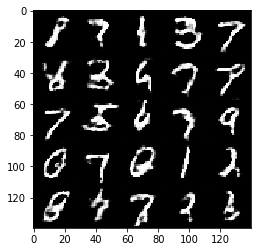

Epoch 1/2... Discriminator Loss: 1.7952... Generator Loss: 5.2432
Epoch 1/2... Discriminator Loss: 1.4463... Generator Loss: 4.2816
Epoch 1/2... Discriminator Loss: 1.0961... Generator Loss: 0.8325
Epoch 2/2... Discriminator Loss: 0.6551... Generator Loss: 1.2724
Epoch 2/2... Discriminator Loss: 0.7200... Generator Loss: 1.4638
Epoch 2/2... Discriminator Loss: 0.5777... Generator Loss: 1.5042
Epoch 2/2... Discriminator Loss: 0.2303... Generator Loss: 2.7857
Epoch 2/2... Discriminator Loss: 0.3865... Generator Loss: 2.2240
Epoch 2/2... Discriminator Loss: 0.3154... Generator Loss: 1.8828
Epoch 2/2... Discriminator Loss: 0.7644... Generator Loss: 1.7238


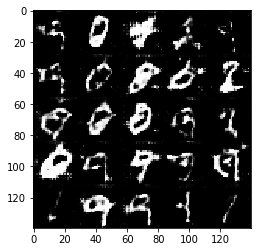

Epoch 2/2... Discriminator Loss: 1.1061... Generator Loss: 1.1642
Epoch 2/2... Discriminator Loss: 0.4677... Generator Loss: 1.6079
Epoch 2/2... Discriminator Loss: 0.7007... Generator Loss: 1.0009
Epoch 2/2... Discriminator Loss: 0.4347... Generator Loss: 1.7088
Epoch 2/2... Discriminator Loss: 0.9646... Generator Loss: 0.9984
Epoch 2/2... Discriminator Loss: 1.4911... Generator Loss: 0.6402
Epoch 2/2... Discriminator Loss: 2.0375... Generator Loss: 0.3238
Epoch 2/2... Discriminator Loss: 0.8125... Generator Loss: 1.1939
Epoch 2/2... Discriminator Loss: 0.7405... Generator Loss: 1.4012
Epoch 2/2... Discriminator Loss: 0.7560... Generator Loss: 1.0496


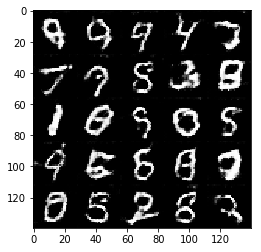

Epoch 2/2... Discriminator Loss: 0.5857... Generator Loss: 1.7651
Epoch 2/2... Discriminator Loss: 0.6918... Generator Loss: 1.8810
Epoch 2/2... Discriminator Loss: 0.7104... Generator Loss: 1.1472
Epoch 2/2... Discriminator Loss: 0.3617... Generator Loss: 3.1443
Epoch 2/2... Discriminator Loss: 1.0191... Generator Loss: 0.9000
Epoch 2/2... Discriminator Loss: 1.8796... Generator Loss: 0.4269
Epoch 2/2... Discriminator Loss: 1.1629... Generator Loss: 3.7021
Epoch 2/2... Discriminator Loss: 0.6432... Generator Loss: 1.7071
Epoch 2/2... Discriminator Loss: 0.9379... Generator Loss: 0.8923
Epoch 2/2... Discriminator Loss: 0.5546... Generator Loss: 1.5242


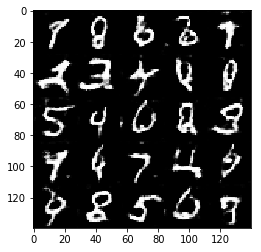

Epoch 2/2... Discriminator Loss: 3.5013... Generator Loss: 0.1325
Epoch 2/2... Discriminator Loss: 0.7734... Generator Loss: 1.2412
Epoch 2/2... Discriminator Loss: 0.5991... Generator Loss: 1.3979
Epoch 2/2... Discriminator Loss: 1.2421... Generator Loss: 0.5080
Epoch 2/2... Discriminator Loss: 0.8774... Generator Loss: 0.9652
Epoch 2/2... Discriminator Loss: 0.8205... Generator Loss: 1.0452
Epoch 2/2... Discriminator Loss: 0.8159... Generator Loss: 1.0423
Epoch 2/2... Discriminator Loss: 0.4317... Generator Loss: 1.8693
Epoch 2/2... Discriminator Loss: 0.4854... Generator Loss: 1.8436
Epoch 2/2... Discriminator Loss: 0.4881... Generator Loss: 2.0004


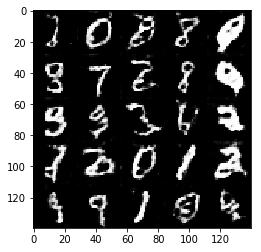

Epoch 2/2... Discriminator Loss: 0.8387... Generator Loss: 0.9884
Epoch 2/2... Discriminator Loss: 0.7040... Generator Loss: 1.1559
Epoch 2/2... Discriminator Loss: 0.8755... Generator Loss: 3.0410
Epoch 2/2... Discriminator Loss: 0.5851... Generator Loss: 1.4466
Epoch 2/2... Discriminator Loss: 1.1786... Generator Loss: 5.7183
Epoch 2/2... Discriminator Loss: 0.8649... Generator Loss: 1.3455
Epoch 2/2... Discriminator Loss: 0.8547... Generator Loss: 3.2071
Epoch 2/2... Discriminator Loss: 0.3651... Generator Loss: 2.0448
Epoch 2/2... Discriminator Loss: 0.9596... Generator Loss: 0.9658
Epoch 2/2... Discriminator Loss: 0.9374... Generator Loss: 1.0498


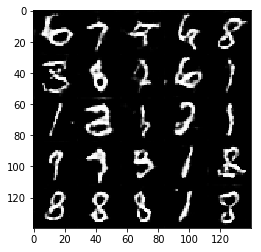

Epoch 2/2... Discriminator Loss: 0.3434... Generator Loss: 2.5188
Epoch 2/2... Discriminator Loss: 0.8737... Generator Loss: 1.0555
Epoch 2/2... Discriminator Loss: 0.9516... Generator Loss: 0.8802
Epoch 2/2... Discriminator Loss: 0.4573... Generator Loss: 1.9135
Epoch 2/2... Discriminator Loss: 0.1745... Generator Loss: 5.6326
Epoch 2/2... Discriminator Loss: 1.7440... Generator Loss: 0.4559
Epoch 2/2... Discriminator Loss: 0.8290... Generator Loss: 1.4413
Epoch 2/2... Discriminator Loss: 0.9262... Generator Loss: 1.0528
Epoch 2/2... Discriminator Loss: 1.2053... Generator Loss: 0.6393
Epoch 2/2... Discriminator Loss: 0.7796... Generator Loss: 1.1998


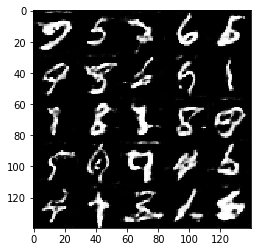

Epoch 2/2... Discriminator Loss: 0.8261... Generator Loss: 1.3554
Epoch 2/2... Discriminator Loss: 0.4090... Generator Loss: 2.2082
Epoch 2/2... Discriminator Loss: 0.5584... Generator Loss: 1.9727
Epoch 2/2... Discriminator Loss: 1.4109... Generator Loss: 0.5716
Epoch 2/2... Discriminator Loss: 0.6980... Generator Loss: 1.3137
Epoch 2/2... Discriminator Loss: 0.4254... Generator Loss: 3.5583
Epoch 2/2... Discriminator Loss: 0.7381... Generator Loss: 1.1007
Epoch 2/2... Discriminator Loss: 1.3137... Generator Loss: 5.2415
Epoch 2/2... Discriminator Loss: 0.8271... Generator Loss: 1.4370
Epoch 2/2... Discriminator Loss: 0.5421... Generator Loss: 2.1774


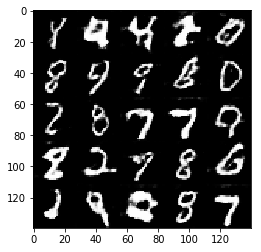

Epoch 2/2... Discriminator Loss: 0.5154... Generator Loss: 2.3729
Epoch 2/2... Discriminator Loss: 0.7950... Generator Loss: 1.2234
Epoch 2/2... Discriminator Loss: 0.5999... Generator Loss: 1.4539
Epoch 2/2... Discriminator Loss: 0.7983... Generator Loss: 1.8028
Epoch 2/2... Discriminator Loss: 0.7661... Generator Loss: 2.0164
Epoch 2/2... Discriminator Loss: 0.7448... Generator Loss: 1.8917
Epoch 2/2... Discriminator Loss: 0.7514... Generator Loss: 1.7118
Epoch 2/2... Discriminator Loss: 1.0169... Generator Loss: 0.8488
Epoch 2/2... Discriminator Loss: 0.7902... Generator Loss: 2.5257
Epoch 2/2... Discriminator Loss: 0.7526... Generator Loss: 1.4474


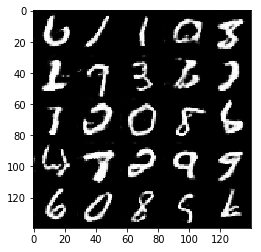

Epoch 2/2... Discriminator Loss: 0.7823... Generator Loss: 1.9729
Epoch 2/2... Discriminator Loss: 0.7600... Generator Loss: 1.7847
Epoch 2/2... Discriminator Loss: 0.6908... Generator Loss: 1.5597
Epoch 2/2... Discriminator Loss: 0.8752... Generator Loss: 1.2296
Epoch 2/2... Discriminator Loss: 1.5819... Generator Loss: 0.6404
Epoch 2/2... Discriminator Loss: 1.0372... Generator Loss: 0.9376
Epoch 2/2... Discriminator Loss: 0.9834... Generator Loss: 0.9349
Epoch 2/2... Discriminator Loss: 0.3423... Generator Loss: 2.7801
Epoch 2/2... Discriminator Loss: 0.5596... Generator Loss: 1.6508
Epoch 2/2... Discriminator Loss: 0.7657... Generator Loss: 1.0408


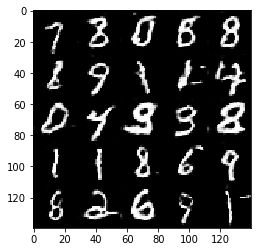

Epoch 2/2... Discriminator Loss: 0.8595... Generator Loss: 1.1295
Epoch 2/2... Discriminator Loss: 0.4496... Generator Loss: 1.5352
Epoch 2/2... Discriminator Loss: 0.2555... Generator Loss: 2.9626
Epoch 2/2... Discriminator Loss: 0.7877... Generator Loss: 5.9285
Epoch 2/2... Discriminator Loss: 1.1833... Generator Loss: 4.4103
Epoch 2/2... Discriminator Loss: 0.3764... Generator Loss: 2.7966
Epoch 2/2... Discriminator Loss: 1.2154... Generator Loss: 0.8105


In [12]:
batch_size = 64
z_dim = 100
learning_rate = 0.01
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 2

mnist_dataset = helper.Dataset('mnist', glob(os.path.join(data_dir, 'mnist/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, mnist_dataset.get_batches,
          mnist_dataset.shape, mnist_dataset.image_mode)

### CelebA
Run your GANs on CelebA.  It will take around 20 minutes on the average GPU to run one epoch.  You can run the whole epoch or stop when it starts to generate realistic faces.

Epoch 1/1... Discriminator Loss: 1.0599... Generator Loss: 1.6430
Epoch 1/1... Discriminator Loss: 1.9248... Generator Loss: 14.2364
Epoch 1/1... Discriminator Loss: 0.7201... Generator Loss: 2.8153
Epoch 1/1... Discriminator Loss: 0.4030... Generator Loss: 2.0914
Epoch 1/1... Discriminator Loss: 0.2483... Generator Loss: 2.9414
Epoch 1/1... Discriminator Loss: 0.2510... Generator Loss: 6.8812
Epoch 1/1... Discriminator Loss: 4.2998... Generator Loss: 0.1119
Epoch 1/1... Discriminator Loss: 0.5530... Generator Loss: 2.1200
Epoch 1/1... Discriminator Loss: 2.2032... Generator Loss: 0.4008
Epoch 1/1... Discriminator Loss: 0.6200... Generator Loss: 1.6490


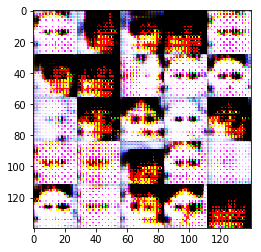

Epoch 1/1... Discriminator Loss: 0.2425... Generator Loss: 4.2359
Epoch 1/1... Discriminator Loss: 0.2668... Generator Loss: 2.1406
Epoch 1/1... Discriminator Loss: 6.6560... Generator Loss: 0.0053
Epoch 1/1... Discriminator Loss: 0.3695... Generator Loss: 1.9106
Epoch 1/1... Discriminator Loss: 0.2652... Generator Loss: 4.3977
Epoch 1/1... Discriminator Loss: 0.1012... Generator Loss: 3.0380
Epoch 1/1... Discriminator Loss: 0.1094... Generator Loss: 2.8761
Epoch 1/1... Discriminator Loss: 0.0319... Generator Loss: 4.2920
Epoch 1/1... Discriminator Loss: 0.0200... Generator Loss: 4.4947
Epoch 1/1... Discriminator Loss: 0.0170... Generator Loss: 4.9865


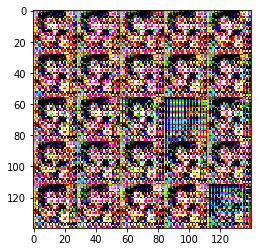

Epoch 1/1... Discriminator Loss: 0.0211... Generator Loss: 4.0969
Epoch 1/1... Discriminator Loss: 0.0123... Generator Loss: 4.7170
Epoch 1/1... Discriminator Loss: 0.0143... Generator Loss: 4.6191
Epoch 1/1... Discriminator Loss: 0.0070... Generator Loss: 5.3321
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 5.9456
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 7.8195
Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 5.3550
Epoch 1/1... Discriminator Loss: 0.0006... Generator Loss: 8.6130
Epoch 1/1... Discriminator Loss: 0.0021... Generator Loss: 7.0307
Epoch 1/1... Discriminator Loss: 0.0252... Generator Loss: 4.1678


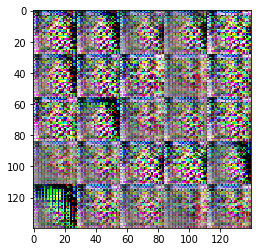

Epoch 1/1... Discriminator Loss: 0.3439... Generator Loss: 1.8795
Epoch 1/1... Discriminator Loss: 8.1376... Generator Loss: 11.9645
Epoch 1/1... Discriminator Loss: 1.1484... Generator Loss: 0.9521
Epoch 1/1... Discriminator Loss: 0.8413... Generator Loss: 1.0485
Epoch 1/1... Discriminator Loss: 0.3160... Generator Loss: 2.8289
Epoch 1/1... Discriminator Loss: 0.6245... Generator Loss: 1.5877
Epoch 1/1... Discriminator Loss: 0.6772... Generator Loss: 1.3091
Epoch 1/1... Discriminator Loss: 0.0929... Generator Loss: 3.1671
Epoch 1/1... Discriminator Loss: 0.9161... Generator Loss: 0.8045
Epoch 1/1... Discriminator Loss: 0.8162... Generator Loss: 1.4910


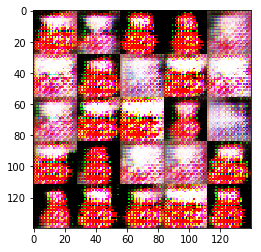

Epoch 1/1... Discriminator Loss: 0.6054... Generator Loss: 1.6091
Epoch 1/1... Discriminator Loss: 1.7237... Generator Loss: 0.3117
Epoch 1/1... Discriminator Loss: 1.0347... Generator Loss: 4.1621
Epoch 1/1... Discriminator Loss: 0.1616... Generator Loss: 2.5663
Epoch 1/1... Discriminator Loss: 1.2704... Generator Loss: 1.5231
Epoch 1/1... Discriminator Loss: 1.0170... Generator Loss: 1.5804
Epoch 1/1... Discriminator Loss: 0.8201... Generator Loss: 2.0475
Epoch 1/1... Discriminator Loss: 0.9674... Generator Loss: 2.2682
Epoch 1/1... Discriminator Loss: 0.7418... Generator Loss: 1.0440
Epoch 1/1... Discriminator Loss: 1.1995... Generator Loss: 0.8289


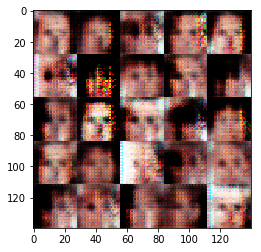

Epoch 1/1... Discriminator Loss: 0.9728... Generator Loss: 1.2679
Epoch 1/1... Discriminator Loss: 0.1678... Generator Loss: 2.0959
Epoch 1/1... Discriminator Loss: 1.9179... Generator Loss: 0.7972
Epoch 1/1... Discriminator Loss: 1.5925... Generator Loss: 0.4700
Epoch 1/1... Discriminator Loss: 1.3109... Generator Loss: 0.9365
Epoch 1/1... Discriminator Loss: 1.0952... Generator Loss: 0.7399
Epoch 1/1... Discriminator Loss: 1.0667... Generator Loss: 1.2518
Epoch 1/1... Discriminator Loss: 1.0833... Generator Loss: 1.6005
Epoch 1/1... Discriminator Loss: 1.2090... Generator Loss: 0.6654
Epoch 1/1... Discriminator Loss: 1.3459... Generator Loss: 0.4518


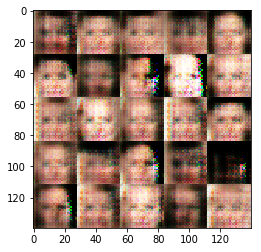

Epoch 1/1... Discriminator Loss: 1.1592... Generator Loss: 0.7278
Epoch 1/1... Discriminator Loss: 0.5089... Generator Loss: 1.1782
Epoch 1/1... Discriminator Loss: 1.4897... Generator Loss: 0.4841
Epoch 1/1... Discriminator Loss: 0.9060... Generator Loss: 0.8994
Epoch 1/1... Discriminator Loss: 1.1046... Generator Loss: 1.2564
Epoch 1/1... Discriminator Loss: 0.7846... Generator Loss: 1.2524
Epoch 1/1... Discriminator Loss: 1.4519... Generator Loss: 0.6417
Epoch 1/1... Discriminator Loss: 0.8875... Generator Loss: 1.1390
Epoch 1/1... Discriminator Loss: 0.6954... Generator Loss: 1.3332
Epoch 1/1... Discriminator Loss: 1.0575... Generator Loss: 0.7715


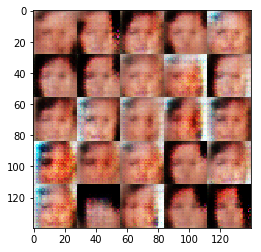

Epoch 1/1... Discriminator Loss: 0.4874... Generator Loss: 1.4555
Epoch 1/1... Discriminator Loss: 0.8569... Generator Loss: 1.6529
Epoch 1/1... Discriminator Loss: 0.5330... Generator Loss: 1.4286
Epoch 1/1... Discriminator Loss: 0.5706... Generator Loss: 1.2394
Epoch 1/1... Discriminator Loss: 1.3360... Generator Loss: 0.7834
Epoch 1/1... Discriminator Loss: 1.1460... Generator Loss: 0.9461
Epoch 1/1... Discriminator Loss: 1.5435... Generator Loss: 1.2921
Epoch 1/1... Discriminator Loss: 1.2947... Generator Loss: 1.0077
Epoch 1/1... Discriminator Loss: 0.9812... Generator Loss: 0.7738
Epoch 1/1... Discriminator Loss: 0.9021... Generator Loss: 1.0091


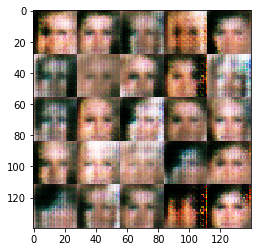

Epoch 1/1... Discriminator Loss: 1.6975... Generator Loss: 0.3636
Epoch 1/1... Discriminator Loss: 1.1495... Generator Loss: 1.7490
Epoch 1/1... Discriminator Loss: 1.4332... Generator Loss: 0.5073
Epoch 1/1... Discriminator Loss: 1.0737... Generator Loss: 1.4129
Epoch 1/1... Discriminator Loss: 0.9947... Generator Loss: 1.1649
Epoch 1/1... Discriminator Loss: 0.9327... Generator Loss: 0.7885
Epoch 1/1... Discriminator Loss: 2.8467... Generator Loss: 3.7045
Epoch 1/1... Discriminator Loss: 1.1066... Generator Loss: 0.7640
Epoch 1/1... Discriminator Loss: 1.3257... Generator Loss: 0.7318
Epoch 1/1... Discriminator Loss: 1.2414... Generator Loss: 0.6927


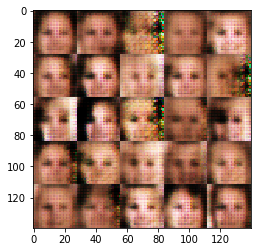

Epoch 1/1... Discriminator Loss: 1.1500... Generator Loss: 0.6761
Epoch 1/1... Discriminator Loss: 1.1366... Generator Loss: 1.3782
Epoch 1/1... Discriminator Loss: 1.0817... Generator Loss: 1.1912
Epoch 1/1... Discriminator Loss: 1.2559... Generator Loss: 1.8626
Epoch 1/1... Discriminator Loss: 0.7237... Generator Loss: 0.8854
Epoch 1/1... Discriminator Loss: 2.8747... Generator Loss: 4.4813
Epoch 1/1... Discriminator Loss: 1.1058... Generator Loss: 1.6009
Epoch 1/1... Discriminator Loss: 1.5485... Generator Loss: 2.7114
Epoch 1/1... Discriminator Loss: 0.1128... Generator Loss: 2.6776
Epoch 1/1... Discriminator Loss: 0.0429... Generator Loss: 3.5819


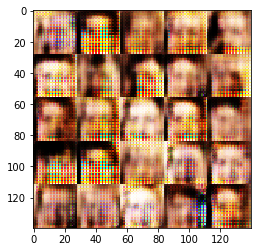

Epoch 1/1... Discriminator Loss: 0.5157... Generator Loss: 1.6720
Epoch 1/1... Discriminator Loss: 0.6663... Generator Loss: 1.2525
Epoch 1/1... Discriminator Loss: 1.3200... Generator Loss: 0.7149
Epoch 1/1... Discriminator Loss: 1.2770... Generator Loss: 0.8589
Epoch 1/1... Discriminator Loss: 1.2727... Generator Loss: 0.8231
Epoch 1/1... Discriminator Loss: 1.0903... Generator Loss: 0.9054
Epoch 1/1... Discriminator Loss: 1.2588... Generator Loss: 0.9443
Epoch 1/1... Discriminator Loss: 1.3377... Generator Loss: 0.7223
Epoch 1/1... Discriminator Loss: 1.9306... Generator Loss: 2.2129
Epoch 1/1... Discriminator Loss: 1.1671... Generator Loss: 0.7087


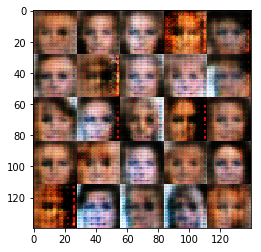

Epoch 1/1... Discriminator Loss: 1.1687... Generator Loss: 0.8379
Epoch 1/1... Discriminator Loss: 1.2565... Generator Loss: 0.8836
Epoch 1/1... Discriminator Loss: 1.2005... Generator Loss: 0.8876
Epoch 1/1... Discriminator Loss: 1.1374... Generator Loss: 1.0306
Epoch 1/1... Discriminator Loss: 1.3966... Generator Loss: 0.5740
Epoch 1/1... Discriminator Loss: 1.0415... Generator Loss: 1.1033
Epoch 1/1... Discriminator Loss: 0.9684... Generator Loss: 0.9168
Epoch 1/1... Discriminator Loss: 1.0960... Generator Loss: 0.7483
Epoch 1/1... Discriminator Loss: 1.4050... Generator Loss: 0.4696
Epoch 1/1... Discriminator Loss: 0.9981... Generator Loss: 0.8448


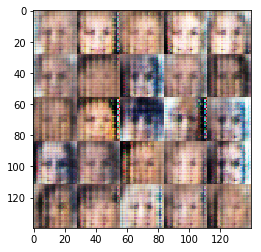

Epoch 1/1... Discriminator Loss: 1.1544... Generator Loss: 0.7428
Epoch 1/1... Discriminator Loss: 0.8897... Generator Loss: 0.8179
Epoch 1/1... Discriminator Loss: 1.4873... Generator Loss: 4.4935
Epoch 1/1... Discriminator Loss: 0.0744... Generator Loss: 2.9589
Epoch 1/1... Discriminator Loss: 0.1471... Generator Loss: 2.1933
Epoch 1/1... Discriminator Loss: 0.4441... Generator Loss: 1.9325
Epoch 1/1... Discriminator Loss: 0.2321... Generator Loss: 2.1043
Epoch 1/1... Discriminator Loss: 0.7121... Generator Loss: 2.4193
Epoch 1/1... Discriminator Loss: 0.7546... Generator Loss: 2.5306
Epoch 1/1... Discriminator Loss: 0.1872... Generator Loss: 2.7901


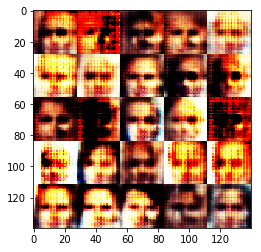

Epoch 1/1... Discriminator Loss: 3.0814... Generator Loss: 4.6092
Epoch 1/1... Discriminator Loss: 1.0383... Generator Loss: 0.8958
Epoch 1/1... Discriminator Loss: 1.1493... Generator Loss: 1.6651
Epoch 1/1... Discriminator Loss: 1.2690... Generator Loss: 0.5808
Epoch 1/1... Discriminator Loss: 0.8363... Generator Loss: 0.9124
Epoch 1/1... Discriminator Loss: 0.0998... Generator Loss: 2.9497
Epoch 1/1... Discriminator Loss: 0.0369... Generator Loss: 8.5350
Epoch 1/1... Discriminator Loss: 0.0248... Generator Loss: 4.2701
Epoch 1/1... Discriminator Loss: 0.0334... Generator Loss: 3.6575
Epoch 1/1... Discriminator Loss: 2.0605... Generator Loss: 1.9144


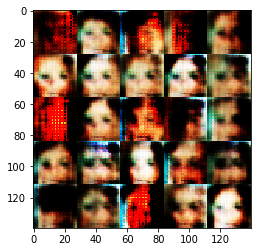

Epoch 1/1... Discriminator Loss: 1.0444... Generator Loss: 0.9581
Epoch 1/1... Discriminator Loss: 1.1086... Generator Loss: 1.5235
Epoch 1/1... Discriminator Loss: 1.4405... Generator Loss: 0.8294
Epoch 1/1... Discriminator Loss: 1.2723... Generator Loss: 0.8949
Epoch 1/1... Discriminator Loss: 1.3811... Generator Loss: 0.8978
Epoch 1/1... Discriminator Loss: 1.2140... Generator Loss: 0.8886
Epoch 1/1... Discriminator Loss: 1.1931... Generator Loss: 0.7947
Epoch 1/1... Discriminator Loss: 1.1329... Generator Loss: 0.9569
Epoch 1/1... Discriminator Loss: 1.2047... Generator Loss: 0.7819
Epoch 1/1... Discriminator Loss: 1.1348... Generator Loss: 0.7894


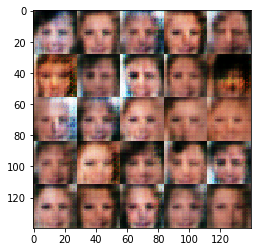

Epoch 1/1... Discriminator Loss: 1.1703... Generator Loss: 0.7048
Epoch 1/1... Discriminator Loss: 0.9536... Generator Loss: 0.7902
Epoch 1/1... Discriminator Loss: 0.7005... Generator Loss: 1.4449
Epoch 1/1... Discriminator Loss: 1.2998... Generator Loss: 0.9111
Epoch 1/1... Discriminator Loss: 1.8471... Generator Loss: 1.8083
Epoch 1/1... Discriminator Loss: 1.0074... Generator Loss: 0.8769
Epoch 1/1... Discriminator Loss: 0.9183... Generator Loss: 1.0497
Epoch 1/1... Discriminator Loss: 1.8909... Generator Loss: 0.2710
Epoch 1/1... Discriminator Loss: 0.5484... Generator Loss: 1.1393
Epoch 1/1... Discriminator Loss: 1.3296... Generator Loss: 0.4726


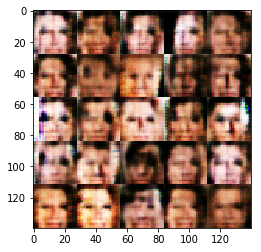

Epoch 1/1... Discriminator Loss: 0.4725... Generator Loss: 4.1779
Epoch 1/1... Discriminator Loss: 0.9896... Generator Loss: 0.8978
Epoch 1/1... Discriminator Loss: 1.0668... Generator Loss: 0.9411
Epoch 1/1... Discriminator Loss: 0.7617... Generator Loss: 1.4525
Epoch 1/1... Discriminator Loss: 0.1014... Generator Loss: 3.2922
Epoch 1/1... Discriminator Loss: 0.0612... Generator Loss: 3.3200
Epoch 1/1... Discriminator Loss: 0.0152... Generator Loss: 5.3399
Epoch 1/1... Discriminator Loss: 0.0089... Generator Loss: 5.0978
Epoch 1/1... Discriminator Loss: 0.0220... Generator Loss: 4.0245
Epoch 1/1... Discriminator Loss: 0.0092... Generator Loss: 5.0508


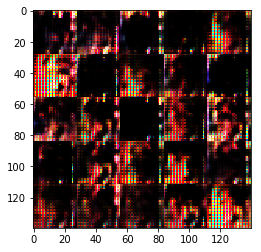

Epoch 1/1... Discriminator Loss: 0.0086... Generator Loss: 5.0162
Epoch 1/1... Discriminator Loss: 0.0063... Generator Loss: 5.1006
Epoch 1/1... Discriminator Loss: 0.0052... Generator Loss: 5.3349
Epoch 1/1... Discriminator Loss: 0.0047... Generator Loss: 5.4026
Epoch 1/1... Discriminator Loss: 0.0053... Generator Loss: 5.3927
Epoch 1/1... Discriminator Loss: 0.0044... Generator Loss: 5.5623
Epoch 1/1... Discriminator Loss: 0.0040... Generator Loss: 5.9498
Epoch 1/1... Discriminator Loss: 0.0061... Generator Loss: 5.4483
Epoch 1/1... Discriminator Loss: 0.0054... Generator Loss: 5.7305
Epoch 1/1... Discriminator Loss: 0.0061... Generator Loss: 5.7824


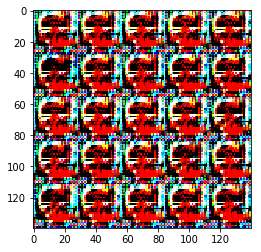

Epoch 1/1... Discriminator Loss: 0.0093... Generator Loss: 5.3069
Epoch 1/1... Discriminator Loss: 0.0194... Generator Loss: 4.4702
Epoch 1/1... Discriminator Loss: 0.0008... Generator Loss: 8.8903
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 9.0609
Epoch 1/1... Discriminator Loss: 0.0059... Generator Loss: 5.8809
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 8.8537
Epoch 1/1... Discriminator Loss: 0.0020... Generator Loss: 7.3124
Epoch 1/1... Discriminator Loss: 0.0004... Generator Loss: 8.2437
Epoch 1/1... Discriminator Loss: 1.1233... Generator Loss: 2.1882
Epoch 1/1... Discriminator Loss: 0.3919... Generator Loss: 5.1269


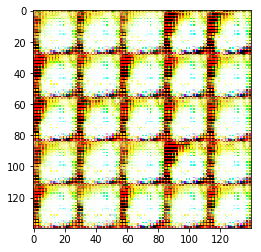

Epoch 1/1... Discriminator Loss: 0.5969... Generator Loss: 1.4243
Epoch 1/1... Discriminator Loss: 0.0962... Generator Loss: 3.6126
Epoch 1/1... Discriminator Loss: 1.0286... Generator Loss: 0.8263
Epoch 1/1... Discriminator Loss: 0.5158... Generator Loss: 1.1305
Epoch 1/1... Discriminator Loss: 2.8309... Generator Loss: 0.1335
Epoch 1/1... Discriminator Loss: 1.1762... Generator Loss: 0.7340
Epoch 1/1... Discriminator Loss: 1.4024... Generator Loss: 0.6062
Epoch 1/1... Discriminator Loss: 1.6940... Generator Loss: 0.3011
Epoch 1/1... Discriminator Loss: 0.8282... Generator Loss: 1.1860
Epoch 1/1... Discriminator Loss: 0.2202... Generator Loss: 3.4901


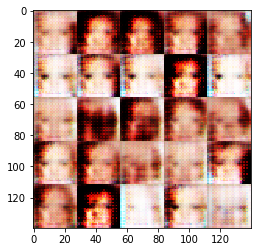

Epoch 1/1... Discriminator Loss: 0.0362... Generator Loss: 4.3499
Epoch 1/1... Discriminator Loss: 0.0824... Generator Loss: 2.7929
Epoch 1/1... Discriminator Loss: 0.0482... Generator Loss: 3.2673
Epoch 1/1... Discriminator Loss: 0.1057... Generator Loss: 2.5969
Epoch 1/1... Discriminator Loss: 0.1021... Generator Loss: 3.7328
Epoch 1/1... Discriminator Loss: 0.3386... Generator Loss: 1.3771
Epoch 1/1... Discriminator Loss: 0.0390... Generator Loss: 3.4774
Epoch 1/1... Discriminator Loss: 0.0769... Generator Loss: 5.2628
Epoch 1/1... Discriminator Loss: 0.0368... Generator Loss: 3.7817
Epoch 1/1... Discriminator Loss: 0.0851... Generator Loss: 9.2749


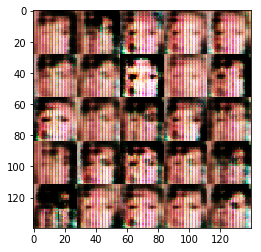

Epoch 1/1... Discriminator Loss: 0.0954... Generator Loss: 9.2083
Epoch 1/1... Discriminator Loss: 0.0189... Generator Loss: 4.6249
Epoch 1/1... Discriminator Loss: 0.0215... Generator Loss: 6.0821
Epoch 1/1... Discriminator Loss: 0.0206... Generator Loss: 4.2053
Epoch 1/1... Discriminator Loss: 0.0091... Generator Loss: 5.2981
Epoch 1/1... Discriminator Loss: 0.0224... Generator Loss: 4.0345
Epoch 1/1... Discriminator Loss: 0.0527... Generator Loss: 3.2373
Epoch 1/1... Discriminator Loss: 0.0108... Generator Loss: 5.1421
Epoch 1/1... Discriminator Loss: 0.0076... Generator Loss: 5.7027
Epoch 1/1... Discriminator Loss: 0.0047... Generator Loss: 7.1192


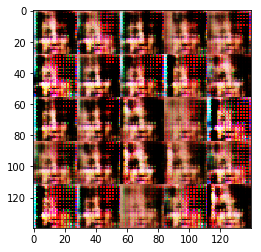

Epoch 1/1... Discriminator Loss: 0.0131... Generator Loss: 4.6790
Epoch 1/1... Discriminator Loss: 0.2315... Generator Loss: 1.9492
Epoch 1/1... Discriminator Loss: 0.0237... Generator Loss: 4.2529
Epoch 1/1... Discriminator Loss: 0.0208... Generator Loss: 4.3888
Epoch 1/1... Discriminator Loss: 0.0151... Generator Loss: 4.5655
Epoch 1/1... Discriminator Loss: 0.0157... Generator Loss: 4.4244
Epoch 1/1... Discriminator Loss: 0.0167... Generator Loss: 4.4495
Epoch 1/1... Discriminator Loss: 0.0099... Generator Loss: 7.3348
Epoch 1/1... Discriminator Loss: 0.0142... Generator Loss: 4.8694
Epoch 1/1... Discriminator Loss: 0.0167... Generator Loss: 4.4216


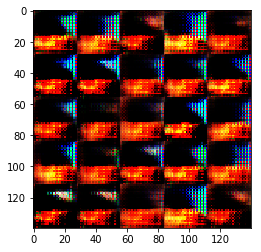

Epoch 1/1... Discriminator Loss: 0.0177... Generator Loss: 4.4642
Epoch 1/1... Discriminator Loss: 0.0107... Generator Loss: 4.9067
Epoch 1/1... Discriminator Loss: 0.0066... Generator Loss: 9.6596
Epoch 1/1... Discriminator Loss: 0.0108... Generator Loss: 5.3206
Epoch 1/1... Discriminator Loss: 0.0179... Generator Loss: 7.5085
Epoch 1/1... Discriminator Loss: 0.0057... Generator Loss: 10.8607
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 7.4259
Epoch 1/1... Discriminator Loss: 0.0048... Generator Loss: 6.3022
Epoch 1/1... Discriminator Loss: 0.0052... Generator Loss: 5.6472
Epoch 1/1... Discriminator Loss: 0.0077... Generator Loss: 5.2295


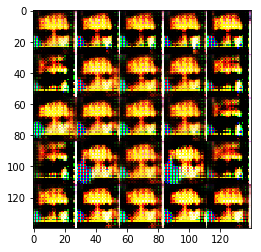

Epoch 1/1... Discriminator Loss: 0.0042... Generator Loss: 7.1482
Epoch 1/1... Discriminator Loss: 0.0042... Generator Loss: 5.9252
Epoch 1/1... Discriminator Loss: 0.0082... Generator Loss: 5.6810
Epoch 1/1... Discriminator Loss: 0.0112... Generator Loss: 5.0362
Epoch 1/1... Discriminator Loss: 0.0110... Generator Loss: 4.6558
Epoch 1/1... Discriminator Loss: 0.3467... Generator Loss: 1.5083
Epoch 1/1... Discriminator Loss: 0.0118... Generator Loss: 4.6383
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 8.9739
Epoch 1/1... Discriminator Loss: 0.0052... Generator Loss: 5.7893
Epoch 1/1... Discriminator Loss: 0.0033... Generator Loss: 6.0495


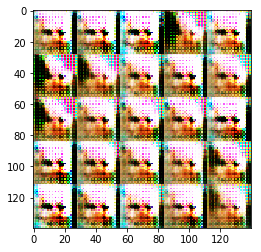

Epoch 1/1... Discriminator Loss: 0.0019... Generator Loss: 7.4952
Epoch 1/1... Discriminator Loss: 0.0078... Generator Loss: 5.3249
Epoch 1/1... Discriminator Loss: 0.6130... Generator Loss: 3.9314
Epoch 1/1... Discriminator Loss: 0.0363... Generator Loss: 3.6507
Epoch 1/1... Discriminator Loss: 0.0436... Generator Loss: 3.4509
Epoch 1/1... Discriminator Loss: 0.1489... Generator Loss: 3.8887
Epoch 1/1... Discriminator Loss: 0.1589... Generator Loss: 6.2178
Epoch 1/1... Discriminator Loss: 0.3151... Generator Loss: 2.5540
Epoch 1/1... Discriminator Loss: 0.0123... Generator Loss: 5.2689
Epoch 1/1... Discriminator Loss: 0.0417... Generator Loss: 3.6643


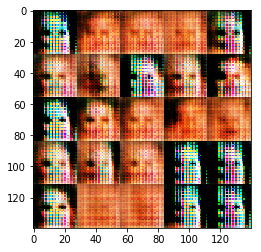

Epoch 1/1... Discriminator Loss: 0.0403... Generator Loss: 4.1885
Epoch 1/1... Discriminator Loss: 0.0158... Generator Loss: 4.8153
Epoch 1/1... Discriminator Loss: 0.0048... Generator Loss: 7.6988
Epoch 1/1... Discriminator Loss: 0.0105... Generator Loss: 5.4752
Epoch 1/1... Discriminator Loss: 0.0410... Generator Loss: 3.6541
Epoch 1/1... Discriminator Loss: 0.0201... Generator Loss: 4.5797
Epoch 1/1... Discriminator Loss: 0.0229... Generator Loss: 16.4973
Epoch 1/1... Discriminator Loss: 0.0043... Generator Loss: 7.7246
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 6.7708
Epoch 1/1... Discriminator Loss: 0.0029... Generator Loss: 7.5281


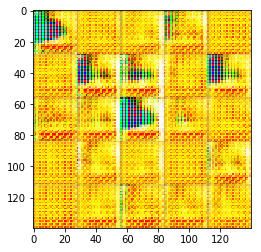

Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 6.6781
Epoch 1/1... Discriminator Loss: 0.0032... Generator Loss: 6.7954
Epoch 1/1... Discriminator Loss: 0.0049... Generator Loss: 6.3226
Epoch 1/1... Discriminator Loss: 0.0023... Generator Loss: 8.1141
Epoch 1/1... Discriminator Loss: 0.0034... Generator Loss: 6.8338
Epoch 1/1... Discriminator Loss: 0.0034... Generator Loss: 6.1953
Epoch 1/1... Discriminator Loss: 0.0035... Generator Loss: 6.7390
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 9.9750
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 7.7066
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 7.0512


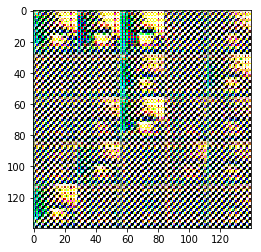

Epoch 1/1... Discriminator Loss: 0.0018... Generator Loss: 6.7644
Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 6.7672
Epoch 1/1... Discriminator Loss: 0.0016... Generator Loss: 6.8655
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 7.2763
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 12.9893
Epoch 1/1... Discriminator Loss: 0.0014... Generator Loss: 7.2566
Epoch 1/1... Discriminator Loss: 0.0015... Generator Loss: 6.7922
Epoch 1/1... Discriminator Loss: 0.0017... Generator Loss: 6.7807
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 10.2144
Epoch 1/1... Discriminator Loss: 0.0006... Generator Loss: 8.6173


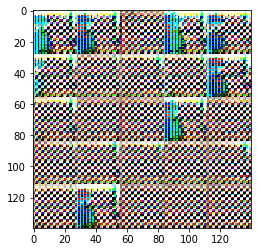

Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 8.2193
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 7.2763
Epoch 1/1... Discriminator Loss: 0.0019... Generator Loss: 8.5224
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 7.9219
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 7.8222
Epoch 1/1... Discriminator Loss: 0.0155... Generator Loss: 9.3451
Epoch 1/1... Discriminator Loss: 0.0012... Generator Loss: 7.6730
Epoch 1/1... Discriminator Loss: 0.0013... Generator Loss: 7.9104
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 15.8892
Epoch 1/1... Discriminator Loss: 0.0007... Generator Loss: 8.8423


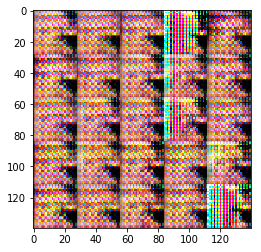

Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 7.8874
Epoch 1/1... Discriminator Loss: 0.0008... Generator Loss: 8.4578
Epoch 1/1... Discriminator Loss: 0.0009... Generator Loss: 8.0879
Epoch 1/1... Discriminator Loss: 0.0000... Generator Loss: 18.9860
Epoch 1/1... Discriminator Loss: 0.0007... Generator Loss: 7.6645
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 21.9798
Epoch 1/1... Discriminator Loss: 0.0001... Generator Loss: 13.7057
Epoch 1/1... Discriminator Loss: 0.0002... Generator Loss: 10.5573
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 9.8517
Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 9.3575


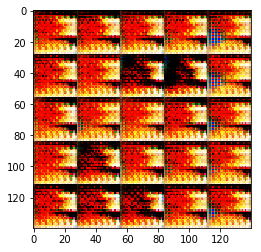

Epoch 1/1... Discriminator Loss: 0.0003... Generator Loss: 8.9521
Epoch 1/1... Discriminator Loss: 0.0005... Generator Loss: 8.4280


KeyboardInterrupt: 

In [13]:
batch_size = 64
z_dim = 100
learning_rate = 0.01
beta1 = 0.5


"""
DON'T MODIFY ANYTHING IN THIS CELL THAT IS BELOW THIS LINE
"""
epochs = 1

celeba_dataset = helper.Dataset('celeba', glob(os.path.join(data_dir, 'img_align_celeba/*.jpg')))
with tf.Graph().as_default():
    train(epochs, batch_size, z_dim, learning_rate, beta1, celeba_dataset.get_batches,
          celeba_dataset.shape, celeba_dataset.image_mode)

### Submitting This Project
When submitting this project, make sure to run all the cells before saving the notebook. Save the notebook file as "dlnd_face_generation.ipynb" and save it as a HTML file under "File" -> "Download as". Include the "helper.py" and "problem_unittests.py" files in your submission.